In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import subprocess

import sys
from copy import copy
import scipy
import imageio
sys.path.append("../")
import itertools
from scipy.stats import norm
import matplotlib.mlab as mlab
from mvgavg import mvgavg
import json
import matplotlib.patches as mpatches
from matplotlib import gridspec
import matplotlib.patches as mpatch
from lovely_numpy import lo
import seaborn
from scipy import stats

from ridgeplot import ridgeplot


from matplotlib.ticker import FormatStrFormatter

from function_figures import *

save_folder = "G:/DREAM/from_github/thesis/Figures/LDA/"
import seaborn as sns

from random import randrange
from joblib import wrap_non_picklable_objects


from alienlab import utils
import alienlab
from alienlab import regression_func
import pickle as pk
from alienlab import plot
from activation_experiment import activation_experiment


from scipy.stats.stats import pearsonr


import skimage.registration


from useful_func import dtw, get_path, plot_warped_timeseries
from useful_func import spectrum_a, spectrum_d
from useful_func import residuals, exp_decay, get_fit, sigmoid, exp_decay_max
from useful_func import gradient_magnitude, gradient_orientation, gaussian_kernel, assign_orientation, crop_center, cconv, get_algae_im
from numpy import genfromtxt

from joblib import Parallel, delayed
from useful_func import make_svm, make_pca
from sklearn.decomposition import PCA

from mpl_toolkits.axes_grid1 import make_axes_locatable



import sklearn
import sklearn.discriminant_analysis
import pandas as pd


import skimage

from useful_func import fit_biexp, fit_exp, fit_monoexp

import tifffile as tiff
import random
import matplotlib
%matplotlib inline


import alienlab.plot

p = alienlab.plot.PlotFigure()
p.extension = ".png"

p.date = False
p.figsize = (10,10)
p.fonttick=17
p.fontsize=25
p.save_folder = "G:/DREAM/from_github/Single_cell_paper/Figures/februaryy"



C:\Users\Alienor\AppData\Local\Temp\ipykernel_20764\2821612677.py:46: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [3]:
purple = [0, 162, 182, 198, 365]#, 162, 182, 198] #0_0_0
            
blue = [2, 164, 367]#[1, 2, 367]#[2, 3] #165, 185, 201, #0_0_3
            
orange = [6, 120, 168, 188, 204, #0_1_2
            7, 121, 169, 189, 205] #0_1_3
            
green = [14, 57, 251,#1_0_2
            15, 252,] #1_0_3
            #229, 239, 228, 238, 36, 46, 35, 45,
    
grey = [12, 55, 249]#1_0_0

red = [17,18, 19]

wt4_activation = [57, 60, 61, 64, 65, 68, 69] #chunck activation

cc124_activation = [257, 260, 261, 264]
cc124_activation_13 = [268, 272, 275, 280]

wt4_inhibition = [249, 250, 251, 252]
wt4_inhibition2 = [12, 13, 14, 15]


method = "combine4"
x = 0 #qT
y = 1 #qE

selected_qE_qT = purple + blue + orange + green + red
idxs_qE_qT = define_idxs(selected_qE_qT, method, id_list, Z)

## STT7 not activated displays qE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


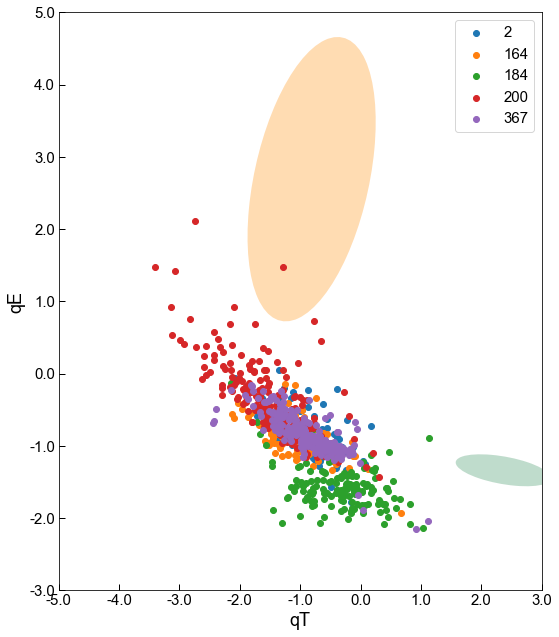

<Figure size 432x288 with 0 Axes>

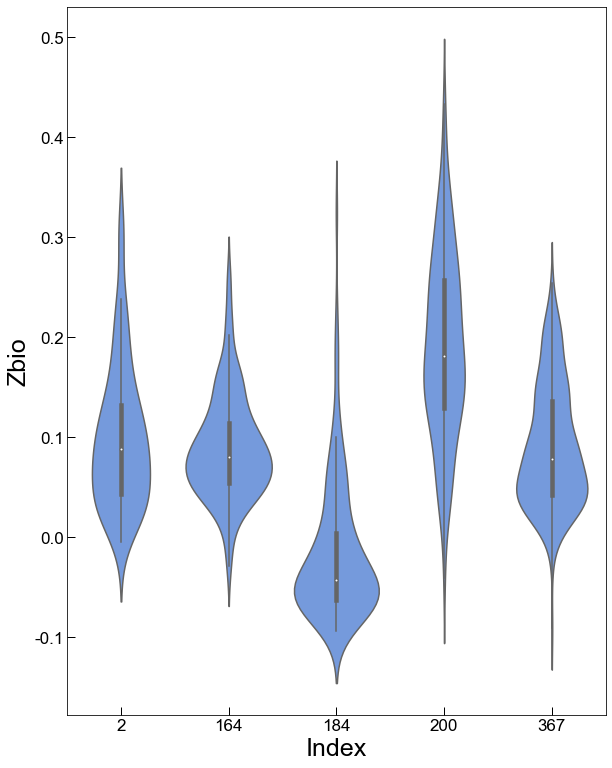

<Figure size 432x288 with 0 Axes>

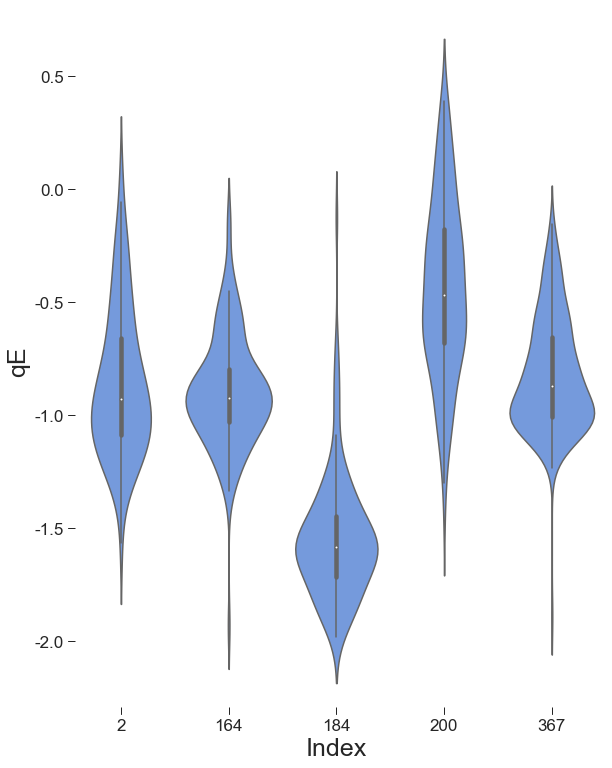

<Figure size 432x288 with 0 Axes>

In [4]:


idxs_qE_qT = np.array(label_list=="0_0_2")# + np.array(label_list=="0_0_3") 
x,y = 0,1

elems = []
axi = []
cat = []

fig1, ax1 = create_ellipse(method, [blue, orange, green], x, y, id_list, Z, lims)

for j, ind in enumerate(np.unique(id_list[idxs_qE_qT])):
    idx = id_list==ind
    FM =  pulses[idx]
    qE = (FM[:,0]-FM[:,1])/FM[:,1] 
    u = Z[method][idx]
    Xc, Yc, Zc = [u[:,0], u[:,1], u[:,2]]
    elems += [Yc]
    axi += [qE]
    cat += [[ind]*(len(Xc))]
    plt.scatter(Xc, Yc, label = ind)
    
plt.ylim(-3, 5)    
plt.xlim(-5, 3)    

plt.legend(prop={'size': 15})

p.save_name = 'posteriori/project_all_stt7_qE_qT'
u = p.saving(fig1)
    
    
elems = np.concatenate(elems)
axi = np.concatenate(axi)
cat = np.concatenate(cat)


df = pd.DataFrame('x', index=range(len(elems)), columns=["Zbio", "qE", "Index"])
df['Zbio'] = axi
df['qE'] = elems
df['Index'] = cat

def crop_column(df, col):
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    df = df[(df[col] < q_hi) & (df[col] > q_low)]
    return df
    
df = crop_column(df, "Zbio")
df = crop_column(df, "qE")

for met in ["Zbio", "qE"]:
    fig = p.set_figure("%0.1f", "%0.1f", (22,27))

    seaborn.violinplot(data=df, x = "Index", y=met, split=False, palette = ["cornflowerblue"],
                       background = 'w')
    seaborn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


    p.save_name = 'posteriori/compare_violin_stt7_' + met
    u = p.saving(fig)


## npq4 activated displays qE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


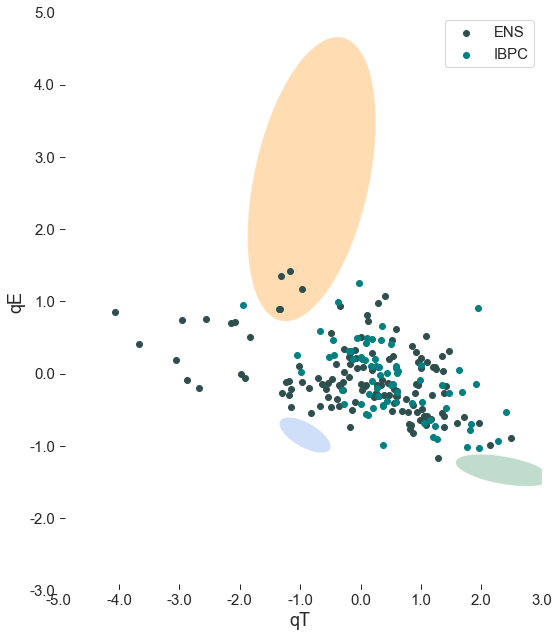

<Figure size 432x288 with 0 Axes>

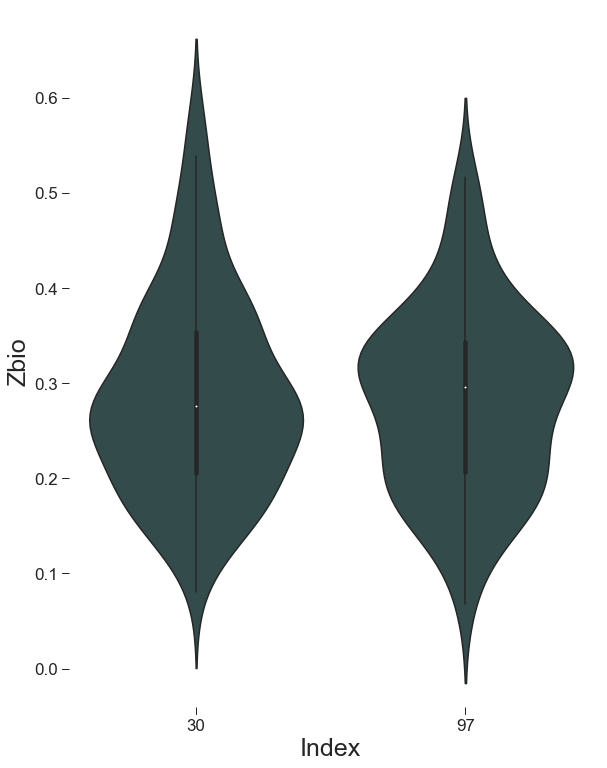

<Figure size 432x288 with 0 Axes>

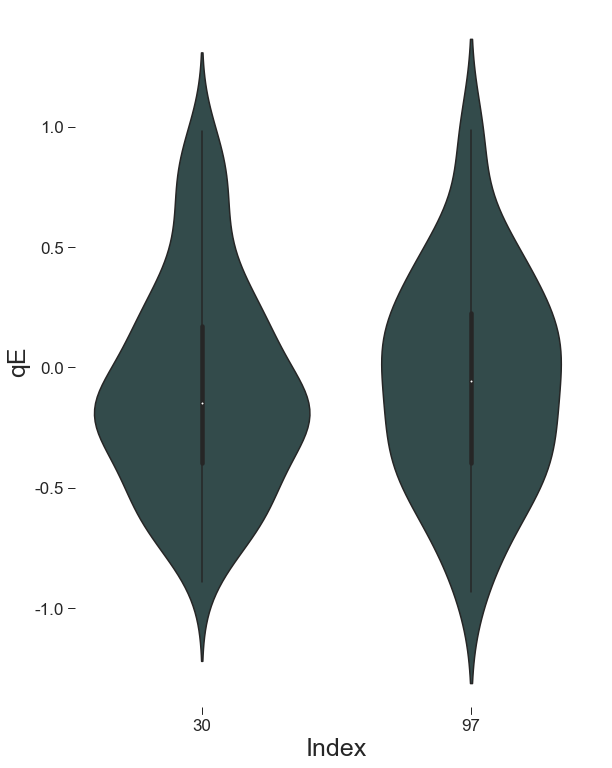

<Figure size 432x288 with 0 Axes>

In [5]:


idxs_qE_qT = np.array(label_list=="4_1_3") + np.array(label_list=="4_1_2") 
x,y = 0,1

elems = []
axi = []
cat = []

fig1, ax1 = create_ellipse(method, [blue, orange, green], x, y, id_list, Z, lims)

for j, ind in enumerate(np.unique(id_list[idxs_qE_qT])):
    if ind in [30, 97]:
        idx = id_list==ind
        FM =  pulses[idx]
        qE = (FM[:,0]-FM[:,1])/FM[:,1] 
        u = Z[method][idx]
        Xc, Yc, Zc = [u[:,0], u[:,1], u[:,2]]
        elems += [Yc]
        axi += [qE]
        cat += [[ind]*(len(Xc))]
        if ind == 30:
            plt.scatter(Xc, Yc, label = "ENS", color = "darkslategray")
        if ind == 97: 
            plt.scatter(Xc, Yc, label = "IBPC", color = "teal")

plt.ylim(-3, 5)    
plt.xlim(-5, 3)    

plt.legend(prop={'size': 15})

p.save_name = 'posteriori/project_all_npq4_qE_qT'
u = p.saving(fig1)
    
    
elems = np.concatenate(elems)
axi = np.concatenate(axi)
cat = np.concatenate(cat)


df = pd.DataFrame('x', index=range(len(elems)), columns=["Zbio", "qE", "Index"])
df['Zbio'] = axi
df['qE'] = elems
df['Index'] = cat

def crop_column(df, col):
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    df = df[(df[col] < q_hi) & (df[col] > q_low)]
    return df
    
df = crop_column(df, "Zbio")
df = crop_column(df, "qE")

for met in ["Zbio", "qE"]:
    fig = p.set_figure("%0.1f", "%0.1f", (22,27))

    seaborn.violinplot(data=df, x = "Index", y=met, split=False, palette = ["darkslategray"],
                       background = 'w')
    seaborn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


    p.save_name = 'posteriori/compare_violin_npq4_' + met
    u = p.saving(fig)


## Projection of the full trace

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

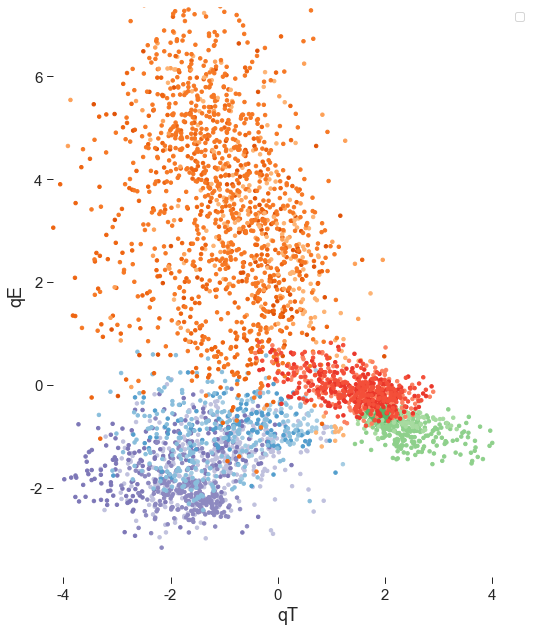

<Figure size 432x288 with 0 Axes>

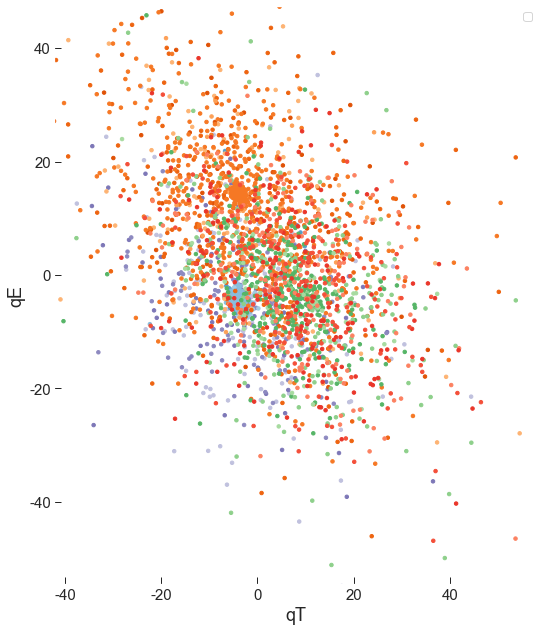

<Figure size 432x288 with 0 Axes>

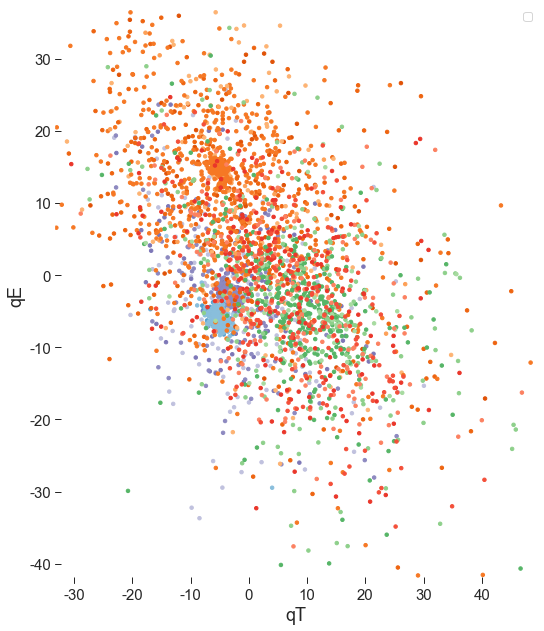

<Figure size 432x288 with 0 Axes>

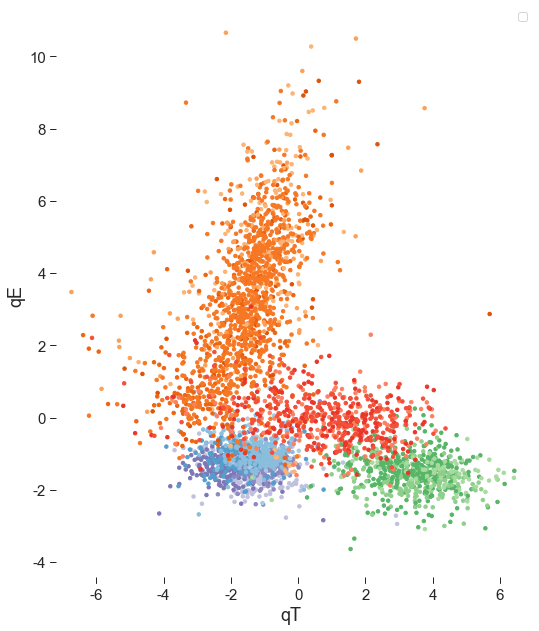

<Figure size 432x288 with 0 Axes>

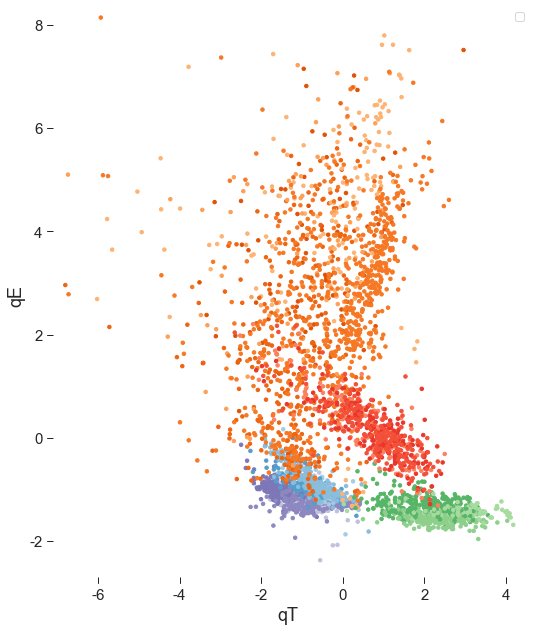

<Figure size 432x288 with 0 Axes>

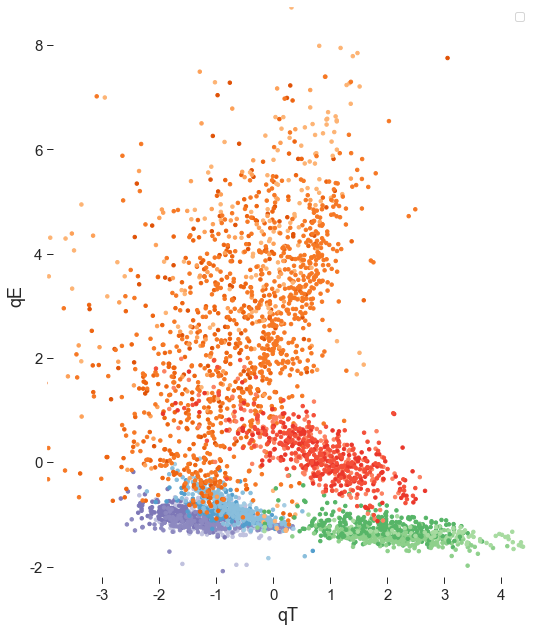

<Figure size 432x288 with 0 Axes>

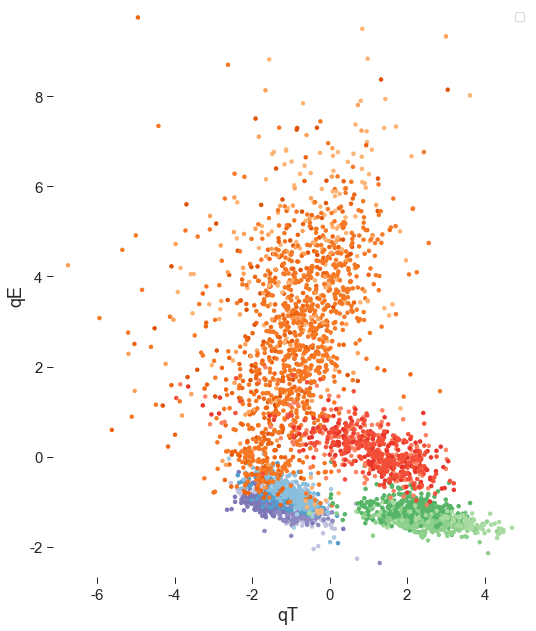

<Figure size 432x288 with 0 Axes>

In [7]:

selected_qE_qT = purple + blue + orange + green + red
idxs_qE_qT = define_idxs(selected_qE_qT, method, id_list, Z)

color_condition = generate_col(10)
p.fontsize = 18
p.fonttick = 15
for method in ["pulses", "actinic", "traces", "combine0", "combine1", "combine2", "combine3"]:

    fig = p.set_figure_flex("%d", "%d", figsize = (22, 27))
    fig = create_fig(idxs_qE_qT, method, x, y, color_condition, fig, id_list, Z, label_list, lims, markersize=12)


    p.save_name = "base/project_table_%s_%s_%s"%(TEI[x], TEI[y], method)
    u = p.saving(fig)

## No LDA

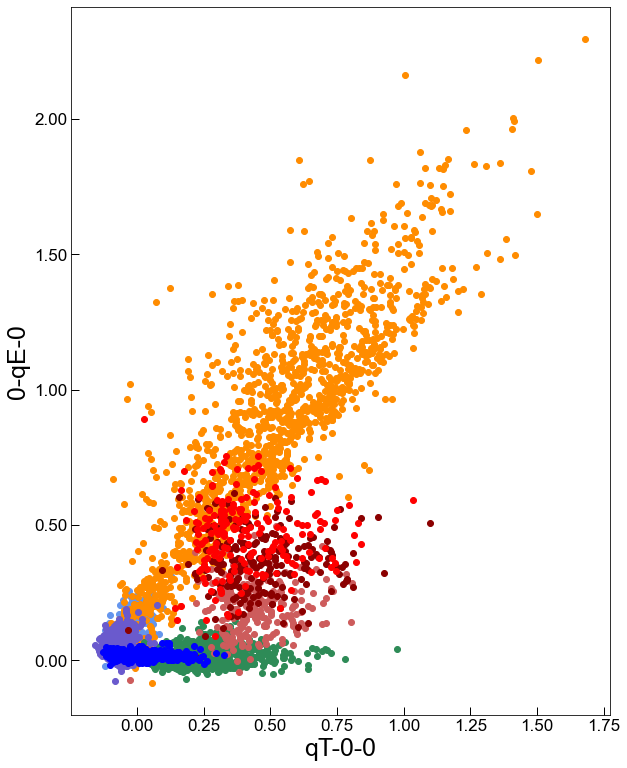

In [100]:
x, y = 0,1
p.xlabel = TEI[x]
p.ylabel = TEI[y]

def NPQ(P, F0, F1):
    return (P[:,F0] - P[:,F1])/P[:,F1] 
    
fig = p.set_figure("%0.2f", "%0.2f", figsize = (22,27))
for i, cl in enumerate([blue, orange, green, purple, [61], [65], [69], [12, 13] ]):
#for i, cl in enumerate([[12], [13], [14], [15]]):

    selected_qE_qT = cl
    idxs_qE_qT = define_idxs(selected_qE_qT, method, id_list, Z)

    P =  pulses[idxs_qE_qT]
    qE= NPQ(P, 0, 1)
    qT = NPQ(P, 8, 1)
    qI = NPQ(P, 0, 90)
    v = [qT, qE, qI]
    plt.plot(v[x], v[y], 'o', color = ["cornflowerblue", "darkorange", "seagreen", "slateblue", "indianred", "darkred", "red", "blue"][i])

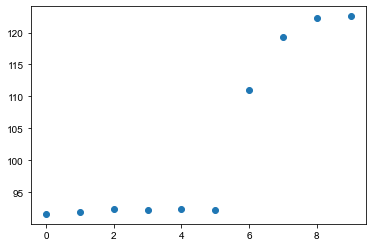

In [78]:
plt.plot(pulses[1000][40:50], 'o')

In [52]:
green

[14, 57, 251, 15, 252]